# Шаблон для проекта по A/B - тестам.

### `chat_id ` из Телеграма:

In [ ]:
1326113898

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

Целевая метрика: NPV (поскольку NPV - это разность между всеми денежными притоками и оттоками, приведёнными к текущему моменту времени, то NPV является показателем эффективности обзвонов со старым/новым скриптом)

H(0): новый скрипт не повлиял на NPV

H(1): новый скрипт повлиял на NPV

### 2. Альтернатива в критерии.

H(1): новый скрипт повлиял на NPV

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

По аналогии с задачами регрессии, беру 70% исторических данных

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
hist_data=pd.read_csv('hist_telesales.csv')
extract=hist_data.head(50513)
extract.head()

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68
3,3,1,0,22,0,-22
4,4,1,0,22,0,-22


### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

Код выборки: 9049

### 4. Принятие решения. Расписать подробно с аргументами.

In [8]:
control=pd.read_csv('Контроль.csv')
test=pd.read_csv('Тест.csv')

Считаем фактические значения целевой метрики, прокси-метрики и барьерной метрики

In [ ]:
#Целевая метрика
a=sum(control['NPV'])
b=sum(test['NPV'])
print(a, b)

14390623 14227916


In [ ]:
#Прокси-метрика
a1=sum(test['Расходы'])
b1=sum(control['Расходы'])
print(a1, b1)

10101523 10153223


In [ ]:
#Барьерная метрика
a2=sum(test['Флаг дозвона'])
b2=sum(control['Флаг дозвона'])
print(a2, b2)

30340 30464


<Axes: >

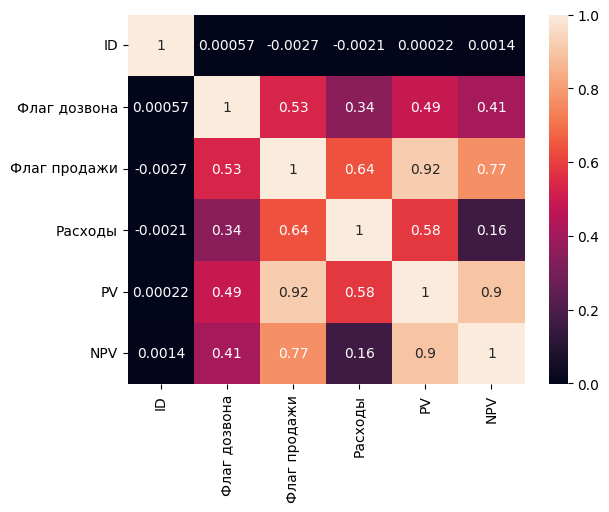

In [ ]:
sns.heatmap(test.corr(), annot = True)

<Axes: >

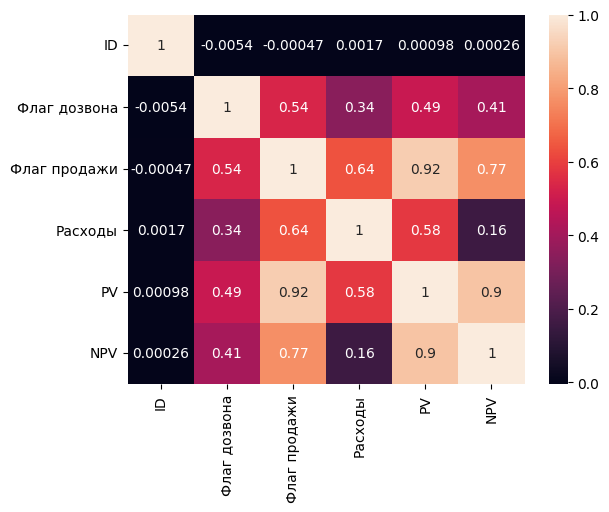

In [ ]:
sns.heatmap(control.corr(), annot = True)

Посчитаем статистическую значимость (Пирсон) и p-value между нашими корреляциями

In [ ]:
from scipy.stats.stats import pearsonr
pirson=pearsonr(control['Расходы'], control['Флаг дозвона'])
pirson

<ipython-input-24-be4eb1d2671e>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.34046523066582124, pvalue=0.0)

In [ ]:
pirson1=pearsonr(test['Расходы'], test['Флаг дозвона'])
pirson1

PearsonRResult(statistic=0.34235023827440203, pvalue=0.0)

In [ ]:
pirson2=pearsonr(control['Расходы'], control['NPV'])
pirson2

PearsonRResult(statistic=0.1566173431172706, pvalue=9.088425728501206e-275)

In [ ]:
pirson3=pearsonr(test['Расходы'], test['NPV'])
pirson3

PearsonRResult(statistic=0.16467604279510925, pvalue=6.090345887595988e-304)

In [ ]:
pirson4=pearsonr(test['Флаг дозвона'], test['NPV'])
pirson4

PearsonRResult(statistic=0.4093397784304568, pvalue=0.0)

In [ ]:
pirson4=pearsonr(control['Флаг дозвона'], control['NPV'])
pirson4

PearsonRResult(statistic=0.41072316856508684, pvalue=0.0)

In [18]:
from scipy.stats import shapiro
shapiro(control['NPV']-test['NPV'])

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8906329870223999, pvalue=0.0)

Данные метрик показали, что новый скрипт не повысил метрику NPV, а даже ухудшил её. Выборки неоднородны. Корреляционный анализ дал понять, что каких-либо неожиданных зависимостей между фактом дозвона до клиента и NPV, расходами на привлечение клиента и NPV, фактом дозвона и расходами на клиента нет. В то же время контрольная выборка показала, что, чем больше мы тратим на привлечение клиента, тем больше дозвонов мы имеем и NPV больше. 

Результат: мы не можем отклонить H(0).

------------------

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

Целевая метрика: Флаг утилизации счёта (потому что цель теста - повышение утилизации счёта)

H(0): новый процесс авторизации не повлиял на целевую метрику

H(1): новый процесс авторизации увеличил целевую метрику

### 2. Альтернатива в критерии.

H(1): новый процесс авторизации увеличил целевую метрику

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Для выявления параметров, влияющих на целевую метрику, проведём корреляционный анализ.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
credit_hist=pd.read_csv('hist_credit_card.csv')

<Axes: >

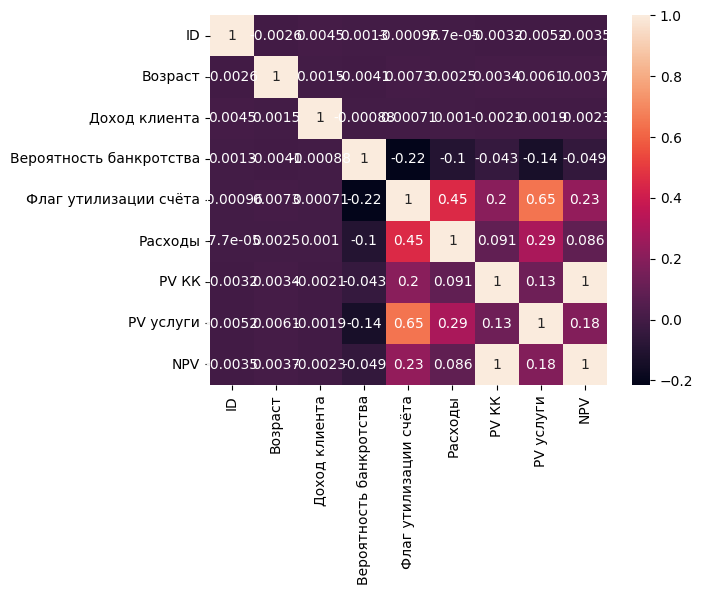

In [17]:
sns.heatmap(credit_hist.corr(), annot = True)

Есть небольшая корреляция между целевой метрикой и PV услуги. В этом нет ничего удивительного, ведь, по условию, PV услуги = 0 если счёт не утилизирован, иначе = PV этой услуги.

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

По аналогии с задачами регрессии, беру 70% исторических данных

In [4]:
extract1=credit_hist.head(86279)

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

Код выборки: 15374

In [5]:
extract1_control=pd.read_csv('Контроль.csv')
extract1_test=pd.read_csv('Тест.csv')

In [13]:
extract1_control.head()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,19,34022.282395,0.052441,0,100,0,0,-100
1,1,40,23915.577700,0.088551,1,535,8877,1868,10210
2,2,53,36075.993820,0.070044,0,19,0,0,-19
3,3,58,48954.683846,0.306224,0,33,0,0,-33
4,4,72,59335.004196,0.002907,1,388,6535,3513,9660


In [14]:
#Целевая метрика
a3=sum(extract1_control['Флаг утилизации счёта'])
b3=sum(extract1_test['Флаг утилизации счёта'])
print(a3, b3)

64199 64078


### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

In [16]:
from scipy.stats import shapiro
shapiro(extract1_control['Флаг утилизации счёта']-extract1_test['Флаг утилизации счёта'])

ShapiroResult(statistic=0.7742345333099365, pvalue=0.0)

Выборки неоднородны. Поскольку p-значение меньше 0.05, у нас нет достаточных доказательств, чтобы сказать, что данные выборки получены из нормального распределения. Данные целевой метрики по тесту и контролю показали, что новый процесс авторизации ухудшил целевую метрику.

Результат: мы не можем отклонить H(0).